# RTED-TDS Co-Sim

NPCC Case

In [1]:
%run -i 'cosim_import.py'

0.post4542.dev0+gd84fd98
2.9.0


`caseH` is the start time [H] of the co-simulation, now 10 and 18 are supported.

In [2]:
caseH = 18
ict = False
ecc = False
agc = False

# --- EV Aggregator ---
sse = ev_ssm(ts=caseH, N=50000, step=1, tp=40,
             lr=0.1, lp=60, seed=2022, name="EVA",
             n_pref=1, is_report=True,
             tt_mean=0.2, tt_var=0.05, tt_lb=0, tt_ub=0.4,
             ict=ict, ecc=ecc, agc=agc)
sse.load_A("Aest.csv")
# historical data
ev_num = pd.read_csv("ev_num.csv")

# --- ANDES case ---
dir_path = os.path.abspath('..')
case_path = '/case/ieee39_ev2.xlsx'
case = dir_path + case_path
ssa = andes.load(case,
                 setup=True,
                 no_output=True,
                 default_config=False)

# Set output mode as 'manual', turn off TDS progress bar
ssa.TDS.config.save_mode = 'manual'
ssa.TDS.config.no_tqdm = 1

# Set load as constant load.
ssa.PQ.config.p2p = 1
ssa.PQ.config.q2q = 1
ssa.PQ.config.p2z = 0
ssa.PQ.config.q2z = 0
ssa.PQ.pq2z = 0

# Turn on ``numba`` can accelerate TDS.
ssa.config.numba = 1


EVA: ts=18[H], 50000 EVs, Total Q=434.54 MWh
Online 14477, Q=362.27 MWh, SoC=0.7435
Power(MW): Pt=-39.0266, Pc=-39.0266, Pd=0.0
Ctrl: 0=7897; 1=6580; 
EVA: Load A from Aest.csv.
Working directory: "/home/jwang175/andes/jwang/notes"
> Loaded config from file "/home/jwang175/.andes/andes.rc"
> Loaded generated Python code in "/home/jwang175/.andes/pycode".
Generated code for <PQ> is stale.
Numerical code generation (rapid incremental mode) started...


Generating code for 1 models on 6 processes.


Saved generated pycode to "/home/jwang175/.andes/pycode"
> Reloaded generated Python code of module "pycode".
Generated numerical code for 1 models in 0.2995 seconds.
Parsing input file "/home/jwang175/andes/jwang/case/ieee39_ev2.xlsx"...
Input file parsed in 0.1330 seconds.
System internal structure set up in 0.0620 seconds.


## Load synthetic

Create load data ``d_syn``, which is a ``DataFrame`` that have three columns: ``time``, ``s10``, ``h10``. ``time`` is by seconds, ``s10`` is scalar load.

ANDES total load is: 58.564 p.u.


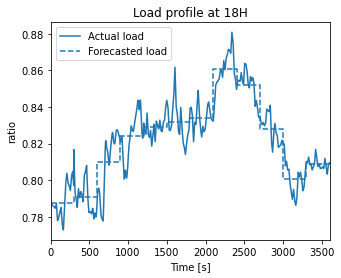

In [3]:
%run -i 'cosim_loadsyn.py'

## Setup ``ssp`` and ``ssd``

Convert ``ssa`` to pandapower net ``ssp``, add generator cost

The input cost array follow the matpower/pypower format, now only poly_cost is supported

In [4]:
%run -i 'cosim_setup_dispatch.py'
dc_comp.round(4)

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: On
   Sparse solver: KLU
 Solution method: NR method
Numba compilation initiated with caching.
Power flow initialized in 0.1346 seconds.
0: |F(x)| = 9.601680411
1: |F(x)| = 3.49745641
2: |F(x)| = 0.1830766445
3: |F(x)| = 0.0007183028649
4: |F(x)| = 1.659285997e-08
Converged in 5 iterations in 0.0185 seconds.
Power flow results are consistent. Conversion is successful.


Restricted license - for non-production use only - expires 2023-10-25


-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: On
   Sparse solver: KLU
 Solution method: NR method
Numba compilation initiated with caching.
Power flow initialized in 0.0180 seconds.
0: |F(x)| = 9.601680411
1: |F(x)| = 3.49745641
2: |F(x)| = 0.1830766445
3: |F(x)| = 0.0007183028649
4: |F(x)| = 1.659285997e-08
Converged in 5 iterations in 0.0141 seconds.
Power flow results are consistent. Conversion is successful.
GSF is consistent.
RTED GB model is loaded.
RTED removed: ['rampu', 'rampd']
RTED limited: sfru, sfrd
RTED: total cost=4889.131


pp cost=2184.5741560778915, gb cost=4889.131241556355


,p_mw,q_mvar,va_degree,vm_pu,p_mw(GB)
0,970.0313,39.9756,15.8831,1.0,970.0312
1,646.0000,228.9208,2.2281,1.0,646.0000
2,290.0000,81.0987,-0.8653,1.0,290.0000
3,652.0000,114.2245,7.2985,1.0,652.0000
4,508.0000,137.9576,5.4672,1.0,508.0000
5,646.6875,212.0871,6.4196,1.0,646.6875
6,232.0000,55.2884,3.4379,1.0,232.0000
7,564.0000,-59.8950,13.9534,1.0,564.0000
8,865.0000,99.7532,18.9462,1.0,865.0000
9,30.0000,0.0000,18.9462,1.0,30.0000


## Prepare

### Make link table

In [5]:
%run -i 'cosim_linktable.py'
ssa_key2

,stg_name,stg_u,stg_idx,bus_idx,dg_idx,rg_idx,rexc_idx,syg_idx,exc_idx,gov_idx,bus_name,gammap,gammaq,gen_pp,ctrl
0,PV_1,1.0,PV_1,30,False,False,False,GENROU_1,IEEEX1_1,TGOV1_1,GEN30,1.0,1.0,0,True
1,PV_2,1.0,PV_2,31,False,False,False,GENROU_2,IEEEX1_2,TGOV1_2,GEN31,1.0,1.0,1,True
2,PV_3,1.0,PV_3,32,False,False,False,GENROU_3,IEEEX1_3,TGOV1_3,GEN32,1.0,1.0,2,True
3,PV_4,1.0,PV_4,33,False,False,False,GENROU_4,IEEEX1_4,TGOV1_4,GEN33,1.0,1.0,3,True
4,PV_5,1.0,PV_5,34,False,False,False,GENROU_5,IEEEX1_5,TGOV1_5,GEN34,1.0,1.0,4,True
5,PV_6,1.0,PV_6,35,False,False,False,GENROU_6,IEEEX1_6,TGOV1_6,GEN35,1.0,1.0,5,True
6,PV_7,1.0,PV_7,36,False,False,False,GENROU_7,IEEEX1_7,TGOV1_7,GEN36,1.0,1.0,6,True
7,PV_8,1.0,PV_8,37,False,False,False,GENROU_8,IEEEX1_8,TGOV1_8,GEN37,1.0,1.0,7,True
8,PV_9,1.0,PV_9,38,False,False,False,GENROU_9,IEEEX1_9,TGOV1_9,GEN38,1.0,1.0,8,True
9,Slack_10,1.0,Slack_10,39,False,False,False,GENROU_10,IEEEX1_10,TGOV1_10,GEN39,1.0,1.0,10,True


## Loop

In the loop, there are mainly X parts:

- interval RTED: run DCOPF (``ssd.mdl``), run ACOPF(``ssp``), 

- interval AGC: do AGC, do dispatch with smooth setpoints

- interval PQ: alter load, run TDS(``ssa.TDS``)

Notes:

- The setpoints for DG are coded but not verified yet.

- After the development of ANDES control room, the dispatch and AGC part can be refactored.

- interface variables: ``DG.pmx``: DPV profile, ``DG.pref0``: setpoints, ``DG.pext0``: AGC

- ACOPF in pandapower considered generator limtis of ramping and SFR reserve

In [6]:
# Change ``rru``, ``rrd``, ``rsfr``, ``t_total`` for necessary.
t_total = 3600

rru, rrd, rsfr = 0.0, 0.0, 0.05

# Define functions and constants used in loop
%run -i 'cosim_const.py'

Check convergence

In [7]:
# %run -i 'cosim_bmain.py'

Loop

In [8]:
%run -i 'cosim_main.py'

RTED GB model is loaded.
RTED removed: ['rampu', 'rampd']
RTED is solved.
RTED: total cost=4660.003
-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: On
   Sparse solver: KLU
 Solution method: NR method
Numba compilation initiated with caching.
Power flow initialized in 0.0111 seconds.
0: |F(x)| = 7.927829696
1: |F(x)| = 3.468670728
2: |F(x)| = 0.1844943166
3: |F(x)| = 0.001215082708
4: |F(x)| = 3.557484218e-08
Converged in 5 iterations in 0.0101 seconds.
Numba compilation initiated with caching.
GENROU (xl <= xd2) out of typical upper limit.

   idx     | values | limit
-----------+--------+------
 GENROU_1  | 0.014  | 0.001
 GENROU_3  | 0.018  | 0.003
 GENROU_4  | 0.013  | 0.001
 GENROU_5  | 0.014  | 0.001
 GENROU_7  | 0.015  | 0.002
 GENROU_8  | 0.015  | 0.006
 GENROU_9  | 0.009  | 0.001
 GENROU_10 | 0.013  | 0.000


Initialization for

Simulation to t=124.00 sec completed in 0.0958 seconds.
Simulation to t=125.00 sec completed in 0.0869 seconds.
Simulation to t=126.00 sec completed in 0.0982 seconds.
Simulation to t=127.00 sec completed in 0.0847 seconds.
Simulation to t=128.00 sec completed in 0.0811 seconds.
Simulation to t=129.00 sec completed in 0.0910 seconds.
Simulation to t=130.00 sec completed in 0.0882 seconds.
Simulation to t=131.00 sec completed in 0.0924 seconds.
Simulation to t=132.00 sec completed in 0.1182 seconds.
Simulation to t=133.00 sec completed in 0.0865 seconds.
Simulation to t=134.00 sec completed in 0.0853 seconds.
Simulation to t=135.00 sec completed in 0.0905 seconds.
Simulation to t=136.00 sec completed in 0.1116 seconds.
Simulation to t=137.00 sec completed in 0.0909 seconds.
Simulation to t=138.00 sec completed in 0.0902 seconds.
Simulation to t=139.00 sec completed in 0.0811 seconds.
Simulation to t=140.00 sec completed in 0.0816 seconds.
Simulation to t=141.00 sec completed in 0.0941 s

Simulation to t=271.00 sec completed in 0.1317 seconds.
Simulation to t=272.00 sec completed in 0.1336 seconds.
Simulation to t=273.00 sec completed in 0.1392 seconds.
Simulation to t=274.00 sec completed in 0.0903 seconds.
Simulation to t=275.00 sec completed in 0.1215 seconds.
Simulation to t=276.00 sec completed in 0.0875 seconds.
Simulation to t=277.00 sec completed in 0.0768 seconds.
Simulation to t=278.00 sec completed in 0.0986 seconds.
Simulation to t=279.00 sec completed in 0.0952 seconds.
Simulation to t=280.00 sec completed in 0.0767 seconds.
Simulation to t=281.00 sec completed in 0.0836 seconds.
Simulation to t=282.00 sec completed in 0.0784 seconds.
Simulation to t=283.00 sec completed in 0.0894 seconds.
Simulation to t=284.00 sec completed in 0.0837 seconds.
Simulation to t=285.00 sec completed in 0.0899 seconds.
Simulation to t=286.00 sec completed in 0.0869 seconds.
Simulation to t=287.00 sec completed in 0.0927 seconds.
Simulation to t=288.00 sec completed in 0.0933 s

Simulation to t=417.00 sec completed in 0.0863 seconds.
Simulation to t=418.00 sec completed in 0.0817 seconds.
Simulation to t=419.00 sec completed in 0.0892 seconds.
Simulation to t=420.00 sec completed in 0.0890 seconds.
Simulation to t=421.00 sec completed in 0.0922 seconds.
Simulation to t=422.00 sec completed in 0.0792 seconds.
Simulation to t=423.00 sec completed in 0.0787 seconds.
Simulation to t=424.00 sec completed in 0.0823 seconds.
Simulation to t=425.00 sec completed in 0.0975 seconds.
Simulation to t=426.00 sec completed in 0.0745 seconds.
Simulation to t=427.00 sec completed in 0.0793 seconds.
Simulation to t=428.00 sec completed in 0.0772 seconds.
Simulation to t=429.00 sec completed in 0.0951 seconds.
Simulation to t=430.00 sec completed in 0.1301 seconds.
Simulation to t=431.00 sec completed in 0.1308 seconds.
Simulation to t=432.00 sec completed in 0.1010 seconds.
Simulation to t=433.00 sec completed in 0.0800 seconds.
Simulation to t=434.00 sec completed in 0.0805 s

Simulation to t=564.00 sec completed in 0.0931 seconds.
Simulation to t=565.00 sec completed in 0.1013 seconds.
Simulation to t=566.00 sec completed in 0.1026 seconds.
Simulation to t=567.00 sec completed in 0.1093 seconds.
Simulation to t=568.00 sec completed in 0.1009 seconds.
Simulation to t=569.00 sec completed in 0.0914 seconds.
Simulation to t=570.00 sec completed in 0.0890 seconds.
Simulation to t=571.00 sec completed in 0.0998 seconds.
Simulation to t=572.00 sec completed in 0.0935 seconds.
Simulation to t=573.00 sec completed in 0.0943 seconds.
Simulation to t=574.00 sec completed in 0.0897 seconds.
Simulation to t=575.00 sec completed in 0.0867 seconds.
Simulation to t=576.00 sec completed in 0.0968 seconds.
Simulation to t=577.00 sec completed in 0.1030 seconds.
Simulation to t=578.00 sec completed in 0.0882 seconds.
Simulation to t=579.00 sec completed in 0.0917 seconds.
Simulation to t=580.00 sec completed in 0.0857 seconds.
Simulation to t=581.00 sec completed in 0.1036 s

Simulation to t=710.00 sec completed in 0.1007 seconds.
Simulation to t=711.00 sec completed in 0.0815 seconds.
Simulation to t=712.00 sec completed in 0.0877 seconds.
Simulation to t=713.00 sec completed in 0.1022 seconds.
Simulation to t=714.00 sec completed in 0.1094 seconds.
Simulation to t=715.00 sec completed in 0.0964 seconds.
Simulation to t=716.00 sec completed in 0.1000 seconds.
Simulation to t=717.00 sec completed in 0.0980 seconds.
Simulation to t=718.00 sec completed in 0.0952 seconds.
Simulation to t=719.00 sec completed in 0.1006 seconds.
Simulation to t=720.00 sec completed in 0.0997 seconds.
Simulation to t=721.00 sec completed in 0.0954 seconds.
Simulation to t=722.00 sec completed in 0.1522 seconds.
Simulation to t=723.00 sec completed in 0.0917 seconds.
Simulation to t=724.00 sec completed in 0.1311 seconds.
Simulation to t=725.00 sec completed in 0.1019 seconds.
Simulation to t=726.00 sec completed in 0.1102 seconds.
Simulation to t=727.00 sec completed in 0.0966 s

Simulation to t=857.00 sec completed in 0.0868 seconds.
Simulation to t=858.00 sec completed in 0.1089 seconds.
Simulation to t=859.00 sec completed in 0.0920 seconds.
Simulation to t=860.00 sec completed in 0.1173 seconds.
Simulation to t=861.00 sec completed in 0.0794 seconds.
Simulation to t=862.00 sec completed in 0.0870 seconds.
Simulation to t=863.00 sec completed in 0.0952 seconds.
Simulation to t=864.00 sec completed in 0.1082 seconds.
Simulation to t=865.00 sec completed in 0.1150 seconds.
Simulation to t=866.00 sec completed in 0.0987 seconds.
Simulation to t=867.00 sec completed in 0.1104 seconds.
Simulation to t=868.00 sec completed in 0.1083 seconds.
Simulation to t=869.00 sec completed in 0.0981 seconds.
Simulation to t=870.00 sec completed in 0.0916 seconds.
Simulation to t=871.00 sec completed in 0.0858 seconds.
Simulation to t=872.00 sec completed in 0.0821 seconds.
Simulation to t=873.00 sec completed in 0.1404 seconds.
Simulation to t=874.00 sec completed in 0.1268 s

Simulation to t=1003.00 sec completed in 0.1065 seconds.
Simulation to t=1004.00 sec completed in 0.0894 seconds.
Simulation to t=1005.00 sec completed in 0.0961 seconds.
Simulation to t=1006.00 sec completed in 0.1050 seconds.
Simulation to t=1007.00 sec completed in 0.0840 seconds.
Simulation to t=1008.00 sec completed in 0.0968 seconds.
Simulation to t=1009.00 sec completed in 0.0988 seconds.
Simulation to t=1010.00 sec completed in 0.1617 seconds.
Simulation to t=1011.00 sec completed in 0.1136 seconds.
Simulation to t=1012.00 sec completed in 0.0898 seconds.
Simulation to t=1013.00 sec completed in 0.0874 seconds.
Simulation to t=1014.00 sec completed in 0.1250 seconds.
Simulation to t=1015.00 sec completed in 0.0902 seconds.
Simulation to t=1016.00 sec completed in 0.0932 seconds.
Simulation to t=1017.00 sec completed in 0.0949 seconds.
Simulation to t=1018.00 sec completed in 0.0878 seconds.
Simulation to t=1019.00 sec completed in 0.0944 seconds.
Simulation to t=1020.00 sec com

Simulation to t=1147.00 sec completed in 0.0903 seconds.
Simulation to t=1148.00 sec completed in 0.1260 seconds.
Simulation to t=1149.00 sec completed in 0.1234 seconds.
Simulation to t=1150.00 sec completed in 0.1158 seconds.
Simulation to t=1151.00 sec completed in 0.1147 seconds.
Simulation to t=1152.00 sec completed in 0.1024 seconds.
Simulation to t=1153.00 sec completed in 0.0975 seconds.
Simulation to t=1154.00 sec completed in 0.1040 seconds.
Simulation to t=1155.00 sec completed in 0.0869 seconds.
Simulation to t=1156.00 sec completed in 0.0888 seconds.
Simulation to t=1157.00 sec completed in 0.0895 seconds.
Simulation to t=1158.00 sec completed in 0.0827 seconds.
Simulation to t=1159.00 sec completed in 0.1049 seconds.
Simulation to t=1160.00 sec completed in 0.0894 seconds.
Simulation to t=1161.00 sec completed in 0.0969 seconds.
Simulation to t=1162.00 sec completed in 0.0940 seconds.
Simulation to t=1163.00 sec completed in 0.0885 seconds.
Simulation to t=1164.00 sec com

Simulation to t=1290.00 sec completed in 0.1080 seconds.
Simulation to t=1291.00 sec completed in 0.0877 seconds.
Simulation to t=1292.00 sec completed in 0.0831 seconds.
Simulation to t=1293.00 sec completed in 0.0886 seconds.
Simulation to t=1294.00 sec completed in 0.0853 seconds.
Simulation to t=1295.00 sec completed in 0.0783 seconds.
Simulation to t=1296.00 sec completed in 0.1193 seconds.
Simulation to t=1297.00 sec completed in 0.1025 seconds.
Simulation to t=1298.00 sec completed in 0.0946 seconds.
Simulation to t=1299.00 sec completed in 0.1130 seconds.
Simulation to t=1300.00 sec completed in 0.0992 seconds.
Simulation to t=1301.00 sec completed in 0.0911 seconds.
Simulation to t=1302.00 sec completed in 0.0846 seconds.
Simulation to t=1303.00 sec completed in 0.0818 seconds.
Simulation to t=1304.00 sec completed in 0.0871 seconds.
Simulation to t=1305.00 sec completed in 0.0960 seconds.
Simulation to t=1306.00 sec completed in 0.0973 seconds.
Simulation to t=1307.00 sec com

Simulation to t=1434.00 sec completed in 0.1095 seconds.
Simulation to t=1435.00 sec completed in 0.1034 seconds.
Simulation to t=1436.00 sec completed in 0.0858 seconds.
Simulation to t=1437.00 sec completed in 0.1181 seconds.
Simulation to t=1438.00 sec completed in 0.0966 seconds.
Simulation to t=1439.00 sec completed in 0.1027 seconds.
Simulation to t=1440.00 sec completed in 0.1065 seconds.
Simulation to t=1441.00 sec completed in 0.0924 seconds.
Simulation to t=1442.00 sec completed in 0.1059 seconds.
Simulation to t=1443.00 sec completed in 0.1216 seconds.
Simulation to t=1444.00 sec completed in 0.1273 seconds.
Simulation to t=1445.00 sec completed in 0.0971 seconds.
Simulation to t=1446.00 sec completed in 0.0876 seconds.
Simulation to t=1447.00 sec completed in 0.0927 seconds.
Simulation to t=1448.00 sec completed in 0.1041 seconds.
Simulation to t=1449.00 sec completed in 0.0817 seconds.
Simulation to t=1450.00 sec completed in 0.0872 seconds.
Simulation to t=1451.00 sec com

Simulation to t=1577.00 sec completed in 0.0933 seconds.
Simulation to t=1578.00 sec completed in 0.1096 seconds.
Simulation to t=1579.00 sec completed in 0.1100 seconds.
Simulation to t=1580.00 sec completed in 0.0946 seconds.
Simulation to t=1581.00 sec completed in 0.0908 seconds.
Simulation to t=1582.00 sec completed in 0.0842 seconds.
Simulation to t=1583.00 sec completed in 0.0888 seconds.
Simulation to t=1584.00 sec completed in 0.1271 seconds.
Simulation to t=1585.00 sec completed in 0.1034 seconds.
Simulation to t=1586.00 sec completed in 0.1178 seconds.
Simulation to t=1587.00 sec completed in 0.1009 seconds.
Simulation to t=1588.00 sec completed in 0.1007 seconds.
Simulation to t=1589.00 sec completed in 0.0898 seconds.
Simulation to t=1590.00 sec completed in 0.1148 seconds.
Simulation to t=1591.00 sec completed in 0.1003 seconds.
Simulation to t=1592.00 sec completed in 0.1067 seconds.
Simulation to t=1593.00 sec completed in 0.0986 seconds.
Simulation to t=1594.00 sec com

Simulation to t=1721.00 sec completed in 0.0876 seconds.
Simulation to t=1722.00 sec completed in 0.1254 seconds.
Simulation to t=1723.00 sec completed in 0.1179 seconds.
Simulation to t=1724.00 sec completed in 0.1343 seconds.
Simulation to t=1725.00 sec completed in 0.1428 seconds.
Simulation to t=1726.00 sec completed in 0.1075 seconds.
Simulation to t=1727.00 sec completed in 0.1339 seconds.
Simulation to t=1728.00 sec completed in 0.1044 seconds.
Simulation to t=1729.00 sec completed in 0.1007 seconds.
Simulation to t=1730.00 sec completed in 0.0972 seconds.
Simulation to t=1731.00 sec completed in 0.1450 seconds.
Simulation to t=1732.00 sec completed in 0.1075 seconds.
Simulation to t=1733.00 sec completed in 0.1030 seconds.
Simulation to t=1734.00 sec completed in 0.1082 seconds.
Simulation to t=1735.00 sec completed in 0.1039 seconds.
Simulation to t=1736.00 sec completed in 0.1076 seconds.
Simulation to t=1737.00 sec completed in 0.1646 seconds.
Simulation to t=1738.00 sec com

Simulation to t=1864.00 sec completed in 0.1016 seconds.
Simulation to t=1865.00 sec completed in 0.1031 seconds.
Simulation to t=1866.00 sec completed in 0.1689 seconds.
Simulation to t=1867.00 sec completed in 0.1016 seconds.
Simulation to t=1868.00 sec completed in 0.1197 seconds.
Simulation to t=1869.00 sec completed in 0.0840 seconds.
Simulation to t=1870.00 sec completed in 0.1066 seconds.
Simulation to t=1871.00 sec completed in 0.0959 seconds.
Simulation to t=1872.00 sec completed in 0.1255 seconds.
Simulation to t=1873.00 sec completed in 0.1068 seconds.
Simulation to t=1874.00 sec completed in 0.0839 seconds.
Simulation to t=1875.00 sec completed in 0.0765 seconds.
Simulation to t=1876.00 sec completed in 0.1000 seconds.
Simulation to t=1877.00 sec completed in 0.0878 seconds.
Simulation to t=1878.00 sec completed in 0.1033 seconds.
Simulation to t=1879.00 sec completed in 0.1057 seconds.
Simulation to t=1880.00 sec completed in 0.0917 seconds.
Simulation to t=1881.00 sec com

Simulation to t=2008.00 sec completed in 0.0992 seconds.
Simulation to t=2009.00 sec completed in 0.0865 seconds.
Simulation to t=2010.00 sec completed in 0.1300 seconds.
Simulation to t=2011.00 sec completed in 0.1040 seconds.
Simulation to t=2012.00 sec completed in 0.1522 seconds.
Simulation to t=2013.00 sec completed in 0.0999 seconds.
Simulation to t=2014.00 sec completed in 0.1056 seconds.
Simulation to t=2015.00 sec completed in 0.1355 seconds.
Simulation to t=2016.00 sec completed in 0.0856 seconds.
Simulation to t=2017.00 sec completed in 0.1069 seconds.
Simulation to t=2018.00 sec completed in 0.1121 seconds.
Simulation to t=2019.00 sec completed in 0.1106 seconds.
Simulation to t=2020.00 sec completed in 0.1171 seconds.
Simulation to t=2021.00 sec completed in 0.1080 seconds.
Simulation to t=2022.00 sec completed in 0.0877 seconds.
Simulation to t=2023.00 sec completed in 0.0960 seconds.
Simulation to t=2024.00 sec completed in 0.1121 seconds.
Simulation to t=2025.00 sec com

Simulation to t=2151.00 sec completed in 0.0987 seconds.
Simulation to t=2152.00 sec completed in 0.0892 seconds.
Simulation to t=2153.00 sec completed in 0.1184 seconds.
Simulation to t=2154.00 sec completed in 0.1506 seconds.
Simulation to t=2155.00 sec completed in 0.1581 seconds.
Simulation to t=2156.00 sec completed in 0.0899 seconds.
Simulation to t=2157.00 sec completed in 0.0910 seconds.
Simulation to t=2158.00 sec completed in 0.0854 seconds.
Simulation to t=2159.00 sec completed in 0.0849 seconds.
Simulation to t=2160.00 sec completed in 0.0862 seconds.
Simulation to t=2161.00 sec completed in 0.1471 seconds.
Simulation to t=2162.00 sec completed in 0.1121 seconds.
Simulation to t=2163.00 sec completed in 0.0958 seconds.
Simulation to t=2164.00 sec completed in 0.0806 seconds.
Simulation to t=2165.00 sec completed in 0.0948 seconds.
Simulation to t=2166.00 sec completed in 0.0858 seconds.
Simulation to t=2167.00 sec completed in 0.0825 seconds.
Simulation to t=2168.00 sec com

Simulation to t=2295.00 sec completed in 0.0900 seconds.
Simulation to t=2296.00 sec completed in 0.1041 seconds.
Simulation to t=2297.00 sec completed in 0.0909 seconds.
Simulation to t=2298.00 sec completed in 0.1116 seconds.
Simulation to t=2299.00 sec completed in 0.1124 seconds.
Simulation to t=2300.00 sec completed in 0.1004 seconds.
Simulation to t=2301.00 sec completed in 0.0975 seconds.
Simulation to t=2302.00 sec completed in 0.0893 seconds.
Simulation to t=2303.00 sec completed in 0.1075 seconds.
Simulation to t=2304.00 sec completed in 0.1156 seconds.
Simulation to t=2305.00 sec completed in 0.0889 seconds.
Simulation to t=2306.00 sec completed in 0.1369 seconds.
Simulation to t=2307.00 sec completed in 0.0871 seconds.
Simulation to t=2308.00 sec completed in 0.1029 seconds.
Simulation to t=2309.00 sec completed in 0.1526 seconds.
Simulation to t=2310.00 sec completed in 0.0977 seconds.
Simulation to t=2311.00 sec completed in 0.0960 seconds.
Simulation to t=2312.00 sec com

Simulation to t=2438.00 sec completed in 0.1187 seconds.
Simulation to t=2439.00 sec completed in 0.1014 seconds.
Simulation to t=2440.00 sec completed in 0.1207 seconds.
Simulation to t=2441.00 sec completed in 0.1019 seconds.
Simulation to t=2442.00 sec completed in 0.1002 seconds.
Simulation to t=2443.00 sec completed in 0.0950 seconds.
Simulation to t=2444.00 sec completed in 0.0913 seconds.
Simulation to t=2445.00 sec completed in 0.1248 seconds.
Simulation to t=2446.00 sec completed in 0.1670 seconds.
Simulation to t=2447.00 sec completed in 0.1016 seconds.
Simulation to t=2448.00 sec completed in 0.0957 seconds.
Simulation to t=2449.00 sec completed in 0.0785 seconds.
Simulation to t=2450.00 sec completed in 0.1137 seconds.
Simulation to t=2451.00 sec completed in 0.1472 seconds.
Simulation to t=2452.00 sec completed in 0.1119 seconds.
Simulation to t=2453.00 sec completed in 0.0901 seconds.
Simulation to t=2454.00 sec completed in 0.2100 seconds.
Simulation to t=2455.00 sec com

Simulation to t=2582.00 sec completed in 0.0990 seconds.
Simulation to t=2583.00 sec completed in 0.1305 seconds.
Simulation to t=2584.00 sec completed in 0.0953 seconds.
Simulation to t=2585.00 sec completed in 0.0802 seconds.
Simulation to t=2586.00 sec completed in 0.0849 seconds.
Simulation to t=2587.00 sec completed in 0.1075 seconds.
Simulation to t=2588.00 sec completed in 0.0995 seconds.
Simulation to t=2589.00 sec completed in 0.1258 seconds.
Simulation to t=2590.00 sec completed in 0.1353 seconds.
Simulation to t=2591.00 sec completed in 0.0939 seconds.
Simulation to t=2592.00 sec completed in 0.1005 seconds.
Simulation to t=2593.00 sec completed in 0.1014 seconds.
Simulation to t=2594.00 sec completed in 0.0841 seconds.
Simulation to t=2595.00 sec completed in 0.1089 seconds.
Simulation to t=2596.00 sec completed in 0.1052 seconds.
Simulation to t=2597.00 sec completed in 0.1068 seconds.
Simulation to t=2598.00 sec completed in 0.0950 seconds.
Simulation to t=2599.00 sec com

Simulation to t=2725.00 sec completed in 0.1031 seconds.
Simulation to t=2726.00 sec completed in 0.0855 seconds.
Simulation to t=2727.00 sec completed in 0.1037 seconds.
Simulation to t=2728.00 sec completed in 0.1460 seconds.
Simulation to t=2729.00 sec completed in 0.1013 seconds.
Simulation to t=2730.00 sec completed in 0.0842 seconds.
Simulation to t=2731.00 sec completed in 0.0909 seconds.
Simulation to t=2732.00 sec completed in 0.1137 seconds.
Simulation to t=2733.00 sec completed in 0.1115 seconds.
Simulation to t=2734.00 sec completed in 0.1788 seconds.
Simulation to t=2735.00 sec completed in 0.0994 seconds.
Simulation to t=2736.00 sec completed in 0.0964 seconds.
Simulation to t=2737.00 sec completed in 0.1028 seconds.
Simulation to t=2738.00 sec completed in 0.1233 seconds.
Simulation to t=2739.00 sec completed in 0.1115 seconds.
Simulation to t=2740.00 sec completed in 0.0941 seconds.
Simulation to t=2741.00 sec completed in 0.1472 seconds.
Simulation to t=2742.00 sec com

Simulation to t=2869.00 sec completed in 0.1047 seconds.
Simulation to t=2870.00 sec completed in 0.1147 seconds.
Simulation to t=2871.00 sec completed in 0.1527 seconds.
Simulation to t=2872.00 sec completed in 0.1265 seconds.
Simulation to t=2873.00 sec completed in 0.1227 seconds.
Simulation to t=2874.00 sec completed in 0.1154 seconds.
Simulation to t=2875.00 sec completed in 0.1399 seconds.
Simulation to t=2876.00 sec completed in 0.1108 seconds.
Simulation to t=2877.00 sec completed in 0.0860 seconds.
Simulation to t=2878.00 sec completed in 0.0918 seconds.
Simulation to t=2879.00 sec completed in 0.1131 seconds.
Simulation to t=2880.00 sec completed in 0.1360 seconds.
Simulation to t=2881.00 sec completed in 0.1042 seconds.
Simulation to t=2882.00 sec completed in 0.0850 seconds.
Simulation to t=2883.00 sec completed in 0.1060 seconds.
Simulation to t=2884.00 sec completed in 0.0886 seconds.
Simulation to t=2885.00 sec completed in 0.1455 seconds.
Simulation to t=2886.00 sec com

Simulation to t=3012.00 sec completed in 0.1166 seconds.
Simulation to t=3013.00 sec completed in 0.0833 seconds.
Simulation to t=3014.00 sec completed in 0.1105 seconds.
Simulation to t=3015.00 sec completed in 0.1077 seconds.
Simulation to t=3016.00 sec completed in 0.1105 seconds.
Simulation to t=3017.00 sec completed in 0.1766 seconds.
Simulation to t=3018.00 sec completed in 0.1177 seconds.
Simulation to t=3019.00 sec completed in 0.1325 seconds.
Simulation to t=3020.00 sec completed in 0.1001 seconds.
Simulation to t=3021.00 sec completed in 0.1307 seconds.
Simulation to t=3022.00 sec completed in 0.1069 seconds.
Simulation to t=3023.00 sec completed in 0.1118 seconds.
Simulation to t=3024.00 sec completed in 0.1235 seconds.
Simulation to t=3025.00 sec completed in 0.0965 seconds.
Simulation to t=3026.00 sec completed in 0.1643 seconds.
Simulation to t=3027.00 sec completed in 0.1249 seconds.
Simulation to t=3028.00 sec completed in 0.1372 seconds.
Simulation to t=3029.00 sec com

Simulation to t=3156.00 sec completed in 0.1055 seconds.
Simulation to t=3157.00 sec completed in 0.0984 seconds.
Simulation to t=3158.00 sec completed in 0.1176 seconds.
Simulation to t=3159.00 sec completed in 0.0839 seconds.
Simulation to t=3160.00 sec completed in 0.0828 seconds.
Simulation to t=3161.00 sec completed in 0.1767 seconds.
Simulation to t=3162.00 sec completed in 0.1161 seconds.
Simulation to t=3163.00 sec completed in 0.1287 seconds.
Simulation to t=3164.00 sec completed in 0.0861 seconds.
Simulation to t=3165.00 sec completed in 0.0838 seconds.
Simulation to t=3166.00 sec completed in 0.0922 seconds.
Simulation to t=3167.00 sec completed in 0.1050 seconds.
Simulation to t=3168.00 sec completed in 0.1081 seconds.
Simulation to t=3169.00 sec completed in 0.1152 seconds.
Simulation to t=3170.00 sec completed in 0.1088 seconds.
Simulation to t=3171.00 sec completed in 0.0817 seconds.
Simulation to t=3172.00 sec completed in 0.0853 seconds.
Simulation to t=3173.00 sec com

RTED GB model is loaded.
RTED is solved.
RTED: total cost=4683.571
Simulation to t=3300.00 sec completed in 0.1101 seconds.
Simulation to t=3301.00 sec completed in 0.0871 seconds.
Simulation to t=3302.00 sec completed in 0.1549 seconds.
Simulation to t=3303.00 sec completed in 0.1389 seconds.
Simulation to t=3304.00 sec completed in 0.1524 seconds.
Simulation to t=3305.00 sec completed in 0.1888 seconds.
Simulation to t=3306.00 sec completed in 0.1583 seconds.
Simulation to t=3307.00 sec completed in 0.1489 seconds.
Simulation to t=3308.00 sec completed in 0.1060 seconds.
Simulation to t=3309.00 sec completed in 0.1409 seconds.
Simulation to t=3310.00 sec completed in 0.1255 seconds.
Simulation to t=3311.00 sec completed in 0.1068 seconds.
Simulation to t=3312.00 sec completed in 0.1065 seconds.
Simulation to t=3313.00 sec completed in 0.1089 seconds.
Simulation to t=3314.00 sec completed in 0.1326 seconds.
Simulation to t=3315.00 sec completed in 0.0904 seconds.
Simulation to t=3316.

Simulation to t=3443.00 sec completed in 0.1429 seconds.
Simulation to t=3444.00 sec completed in 0.0940 seconds.
Simulation to t=3445.00 sec completed in 0.1217 seconds.
Simulation to t=3446.00 sec completed in 0.0856 seconds.
Simulation to t=3447.00 sec completed in 0.0933 seconds.
Simulation to t=3448.00 sec completed in 0.0877 seconds.
Simulation to t=3449.00 sec completed in 0.0959 seconds.
Simulation to t=3450.00 sec completed in 0.0900 seconds.
Simulation to t=3451.00 sec completed in 0.1166 seconds.
Simulation to t=3452.00 sec completed in 0.0972 seconds.
Simulation to t=3453.00 sec completed in 0.1046 seconds.
Simulation to t=3454.00 sec completed in 0.1675 seconds.
Simulation to t=3455.00 sec completed in 0.0891 seconds.
Simulation to t=3456.00 sec completed in 0.1071 seconds.
Simulation to t=3457.00 sec completed in 0.1684 seconds.
Simulation to t=3458.00 sec completed in 0.1427 seconds.
Simulation to t=3459.00 sec completed in 0.1281 seconds.
Simulation to t=3460.00 sec com

Simulation to t=3587.00 sec completed in 0.1217 seconds.
Simulation to t=3588.00 sec completed in 0.1119 seconds.
Simulation to t=3589.00 sec completed in 0.1179 seconds.
Simulation to t=3590.00 sec completed in 0.1152 seconds.
Simulation to t=3591.00 sec completed in 0.1011 seconds.
Simulation to t=3592.00 sec completed in 0.1996 seconds.
Simulation to t=3593.00 sec completed in 0.1164 seconds.
Simulation to t=3594.00 sec completed in 0.0862 seconds.
Simulation to t=3595.00 sec completed in 0.0852 seconds.
Simulation to t=3596.00 sec completed in 0.1111 seconds.
Simulation to t=3597.00 sec completed in 0.1155 seconds.
Simulation to t=3598.00 sec completed in 0.1130 seconds.
Simulation to t=3599.00 sec completed in 0.1104 seconds.


In [9]:
ssa.exit_code

0

(<Figure size 3600x1800 with 1 Axes>,
 <AxesSubplot:title={'center':'AGC response'}, xlabel='Time [s]', ylabel='Power (MW)'>)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times


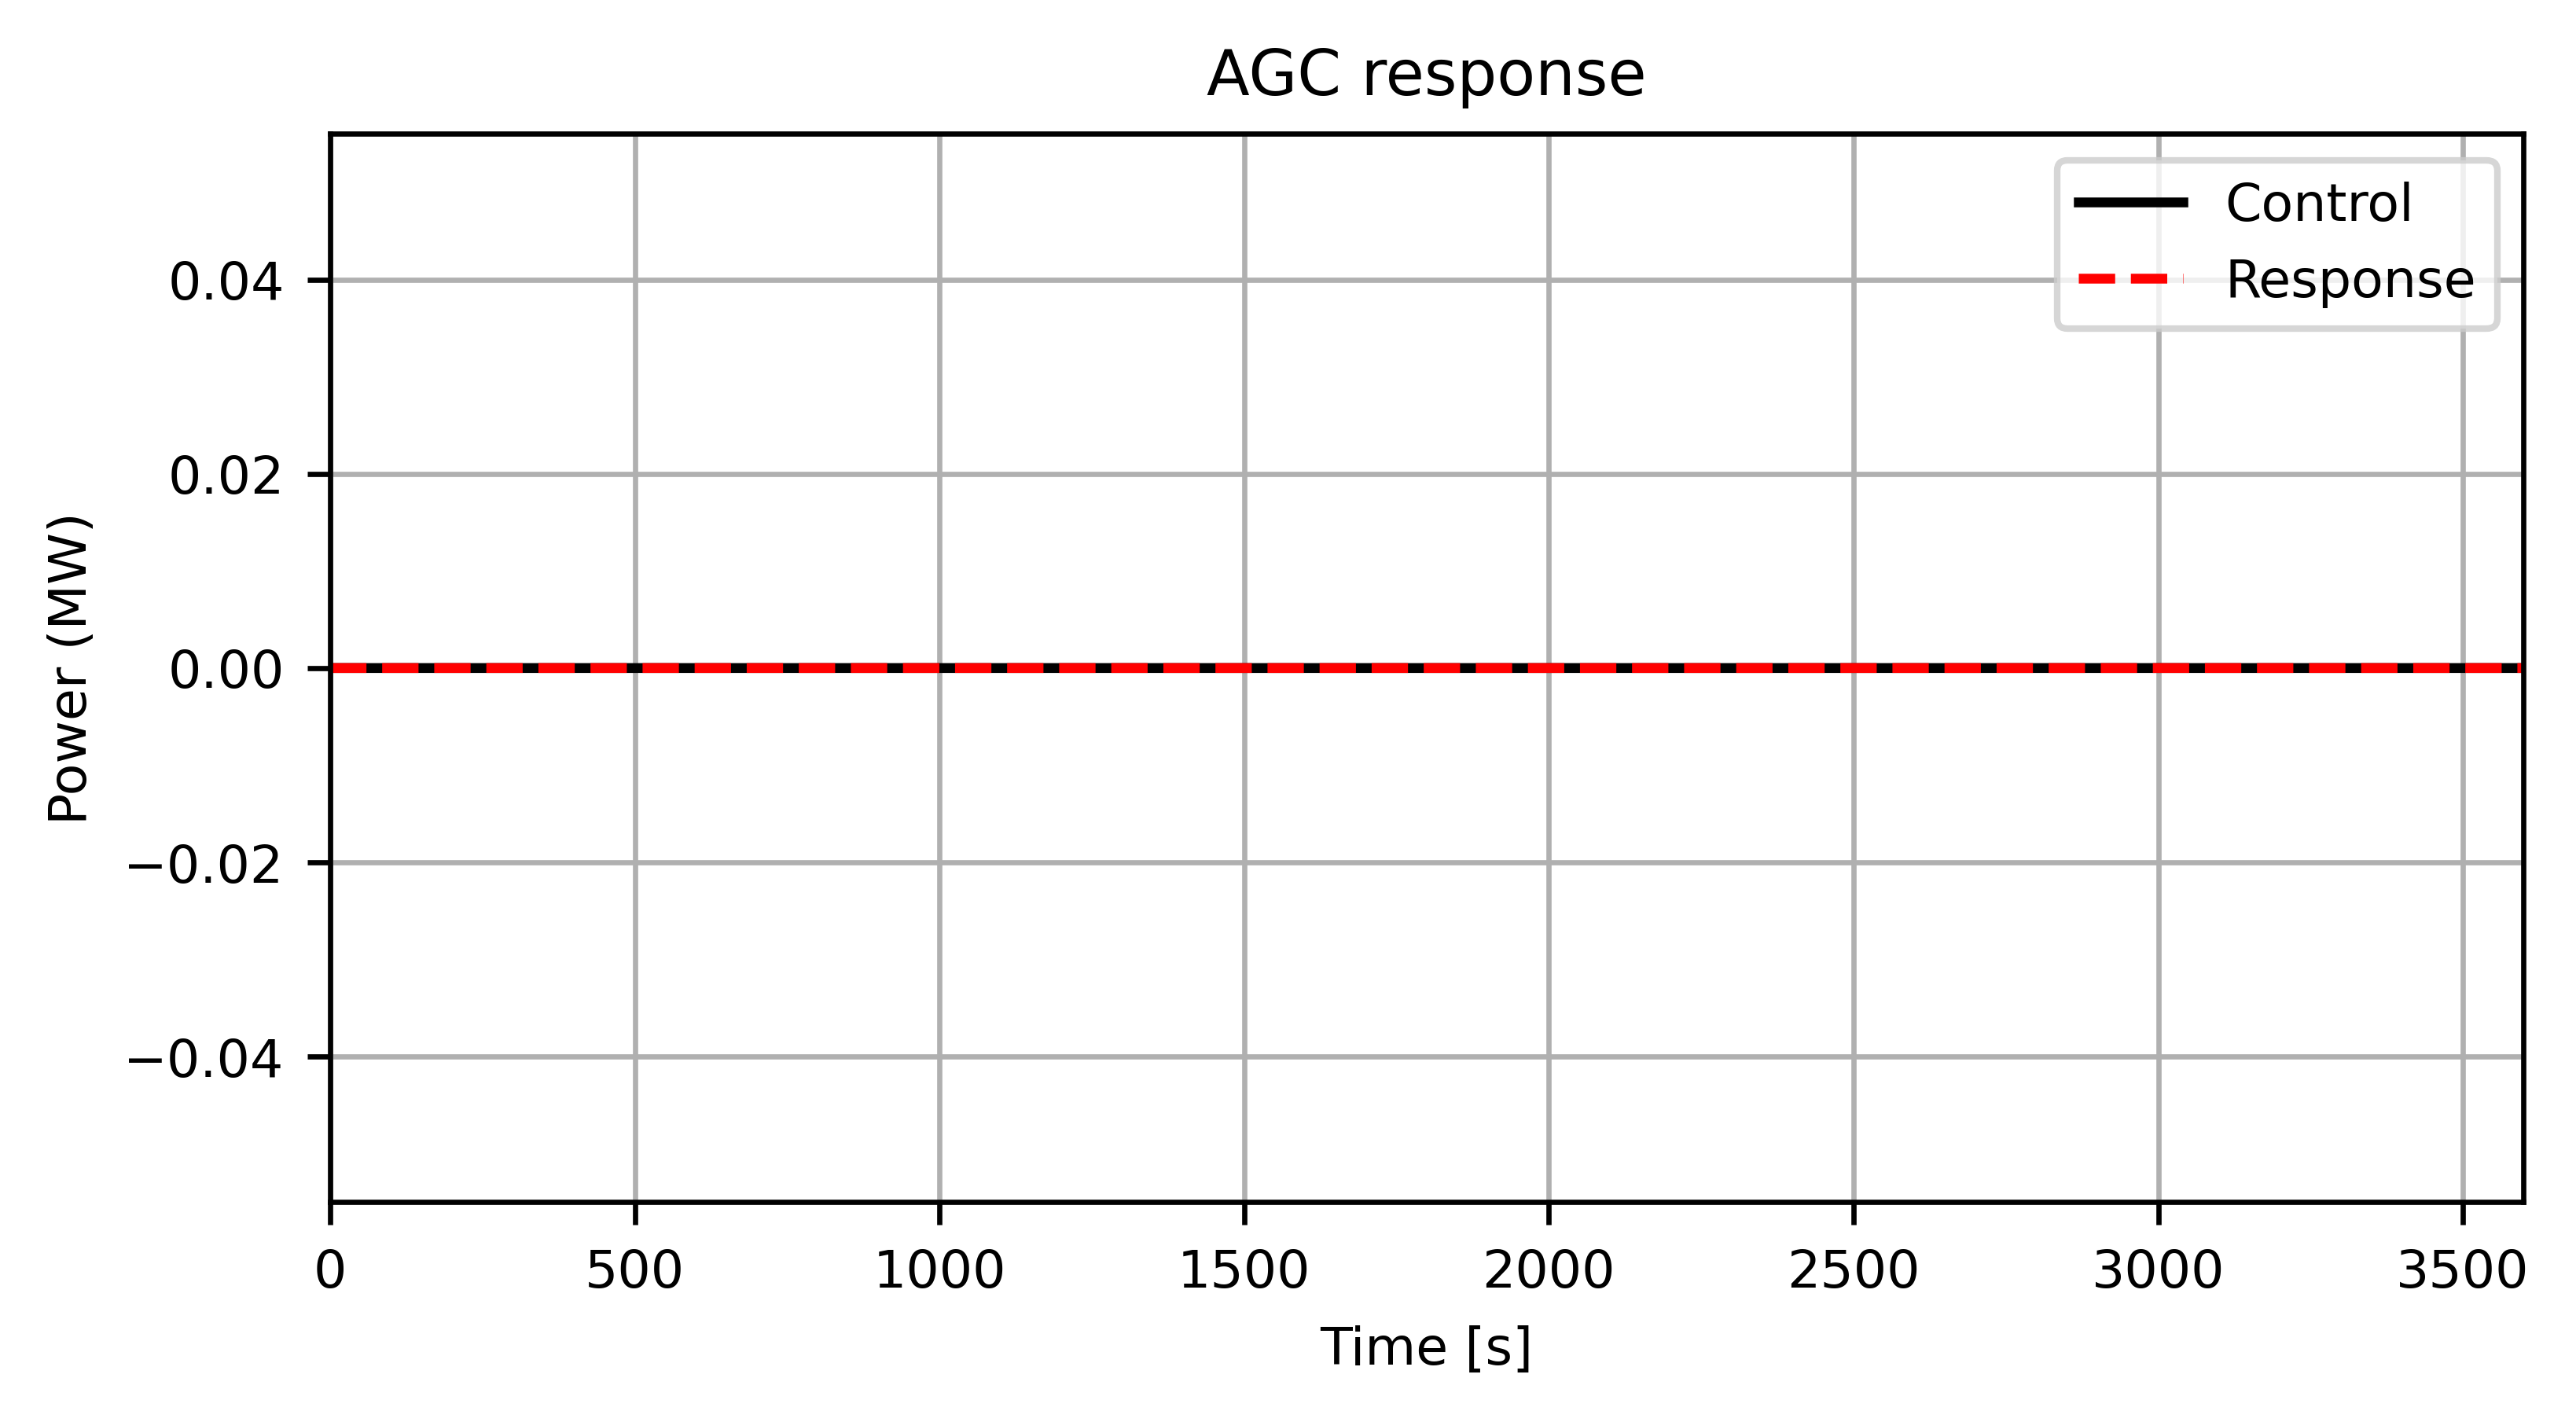

In [10]:
sse.plot_agc(style='ieee')

/home/jwang175/andes/jwang/notes/cosim_plot.py:122: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([f'{np.round(i*100,0)}%' for i in np.arange(0, 1.1, 0.2)])


Total cost=179635.78


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times


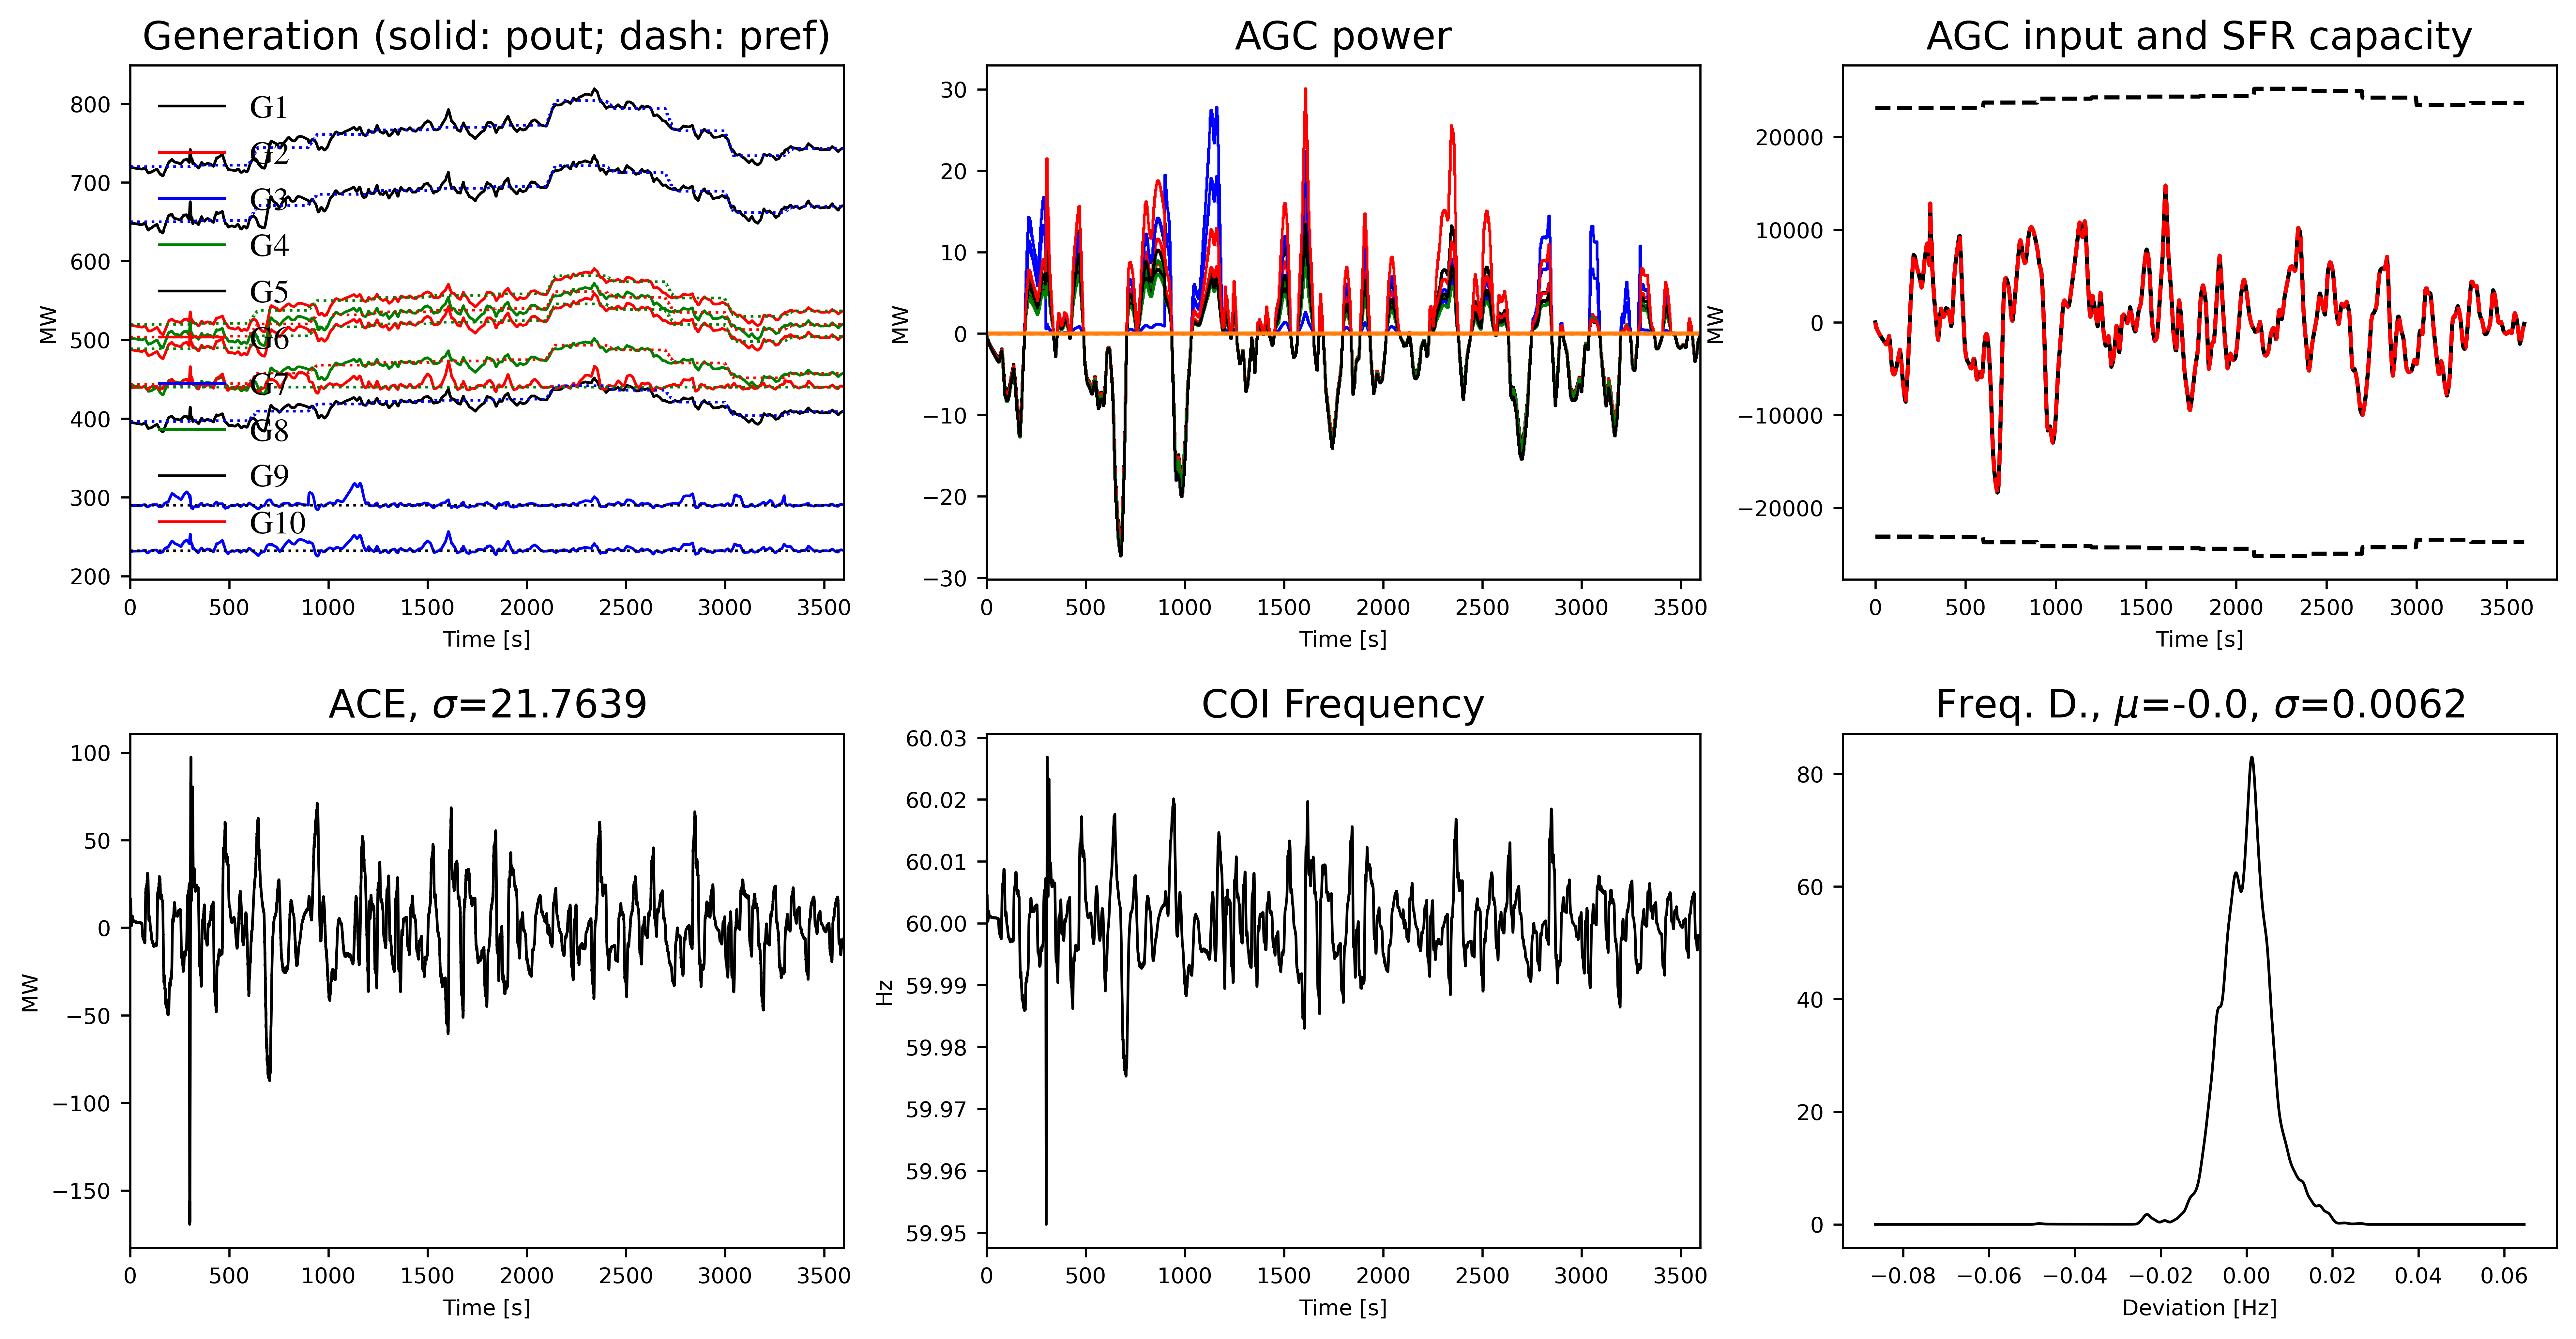

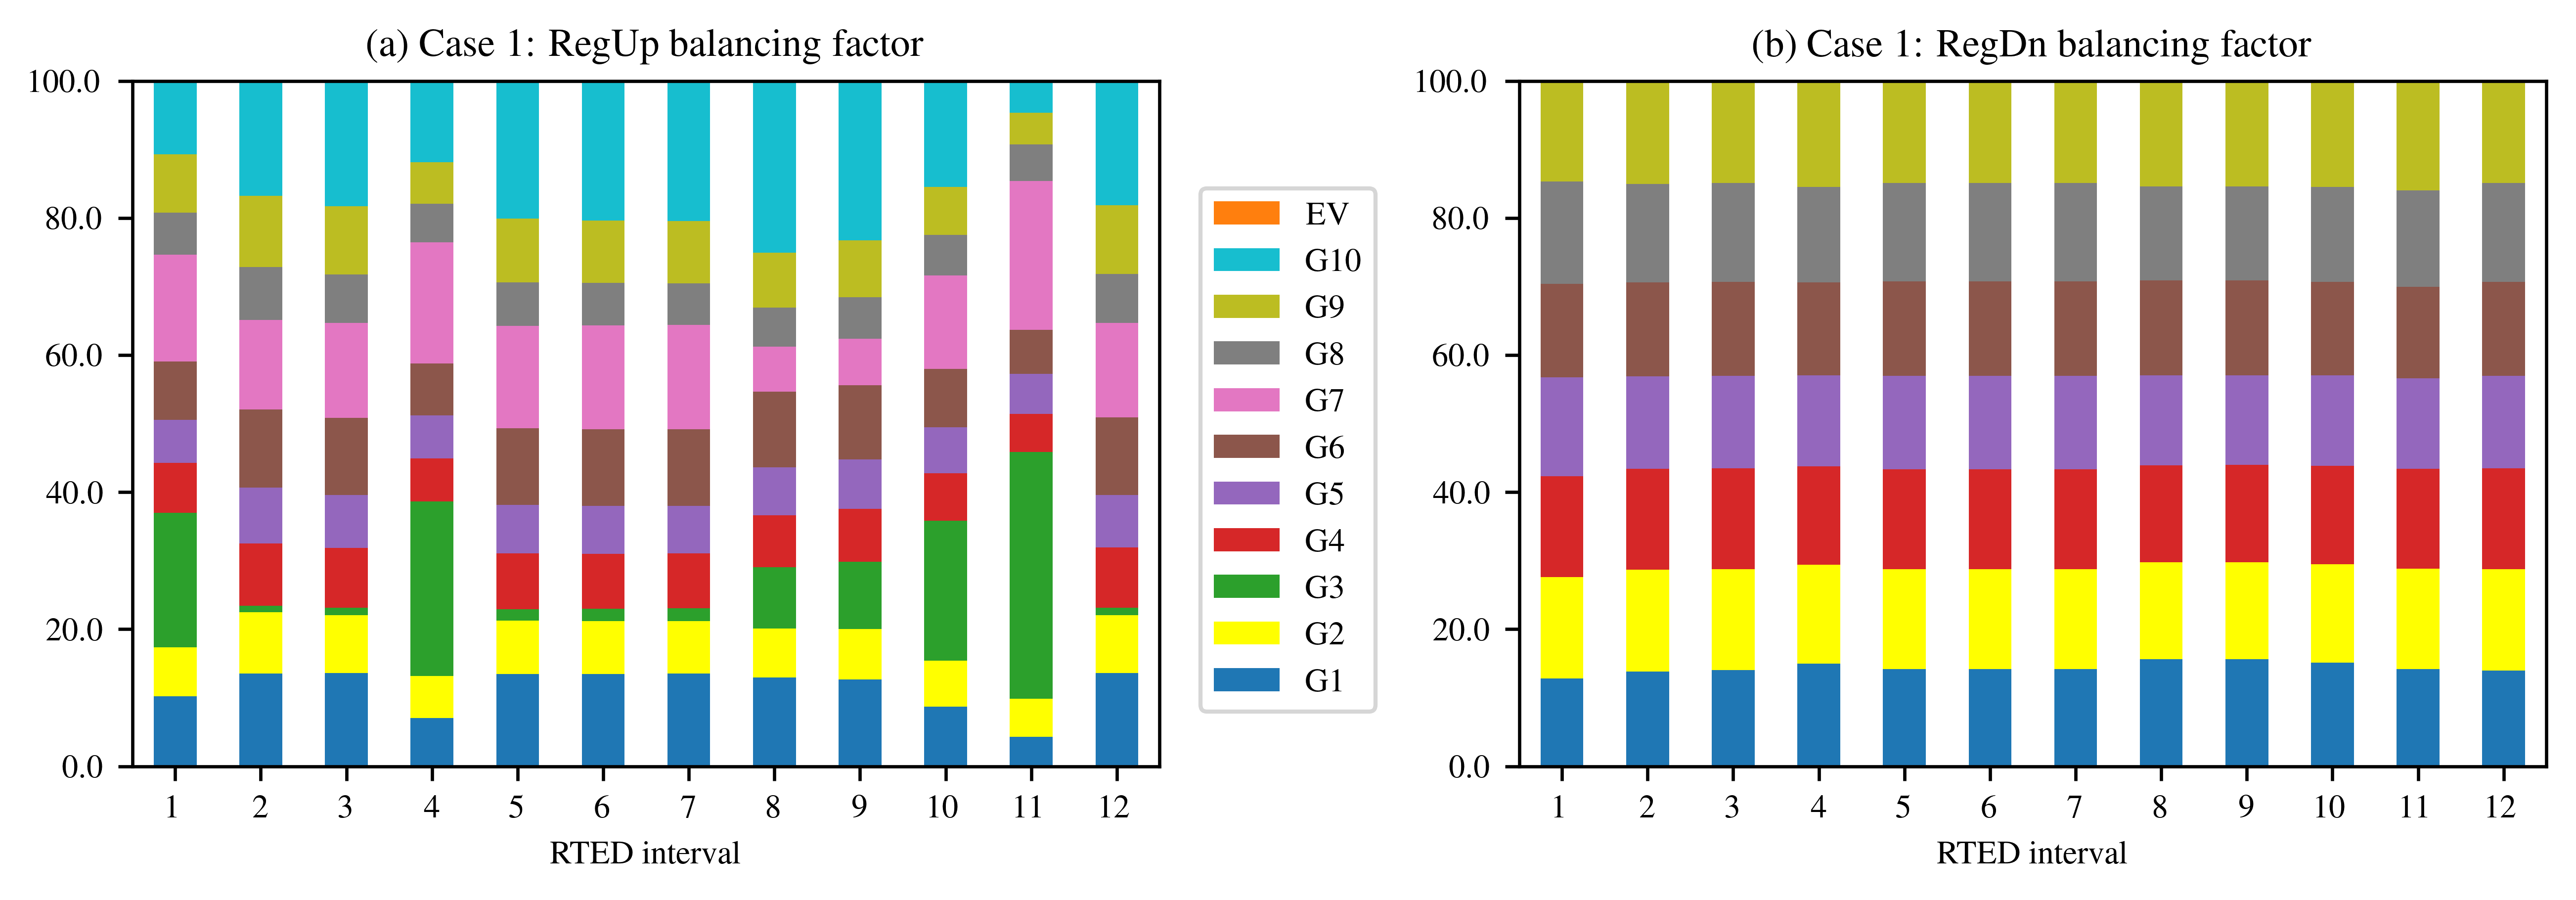

In [11]:
%run -i 'cosim_plot.py'

In [12]:
# --- save output ---
file_beging = 'cosim_'
sim_name = 'ieee39_s'

cosim_out.to_csv(file_beging + sim_name + '_out.csv', index=False)
sse_out.to_csv(file_beging + sim_name + '_sse.csv', index=False)
bu_df.to_csv(file_beging + sim_name + '_bu.csv', index=False)
bd_df.to_csv(file_beging + sim_name + '_bd.csv', index=False)
pg_df.to_csv(file_beging + sim_name + '_pg.csv', index=False)
agc_mile.to_csv(file_beging + sim_name + '_agcm.csv', index=False)
sfr_res.to_csv(file_beging + sim_name + '_sfr.csv', index=False)
ev_agc.to_csv(file_beging + sim_name + '_evagc.csv', index=False)
ev_soc.iloc[0:800].to_csv(file_beging + sim_name + '_evsoc1.csv', index=False)
ev_soc.iloc[800:].to_csv(file_beging + sim_name + '_evsoc2.csv', index=False)
sse.ev.to_csv(file_beging + sim_name + '_evdata.csv', index=False)

import csv
new_path = open(file_beging + sim_name + '_rted.csv', 'w')
z = csv.writer(new_path)
for new_k, new_v in rted_res.items():
    z.writerow([new_k, new_v])
new_path.close()